# Project "Daily climate data in the city of Delhi"


![testo del link](https://www.un.org/sites/un2.un.org/files/2021/09/climatechange11.jpg)

*Description*: the dataset contains data from about climate change in the city of Delhi, India, from the 1st of January 2013 to the 24th April 2017.

Data are presented by 5 signs for 1462 days. What signs do we have?
*   date - date
*   meantemp - Mean temperature averaged out from multiple 3 hour intervals in  a day.
*   humidity - Humidity value for the day (units are grams of water vapor per cubic meter volume of air).
*   wind_speed - Wind speed measured in kmph.
*   Pressure reading of weather (measure in atm).

*Task*: understanding climate changes and do predictions to use for research porpose, using machine learning skills and data analysis.

#**Loading files from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


#**Importing revelant libraries for data visualization**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import*
from sklearn import*
import numpy as np
# Some matplotlib figure sizes
plt.rcParams["figure.figsize"] = (12,8)


# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

# **Data** **exploratory**




In [3]:
#reading data and data descriptive statistics
data = pd.read_csv('/content/gdrive/MyDrive/DailyDelhiClimateTrain.csv')
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


There are outliers both in terms of minimum and maximum values in all features. There is a question with atmospheric pressure. In what units is it represented and how is it measured?

In [4]:
data.describe().style.background_gradient(cmap = 'Oranges')

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


#**Visualize the Data in Facets**
 We created a custom asscalar function because it gives some error with the following cells

In [5]:
import numpy as np
from IPython.core.display import display, HTML
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64
#Adding _asscalar function in numpy module
def custom_asscalar(arr):
    return np.asarray(arr).item()

# Overwrite np.asscalar module
np.asscalar = custom_asscalar

# Data is our Datafrrame
dataframes = [{'table': data, 'name': 'trainData'}]

# Create instance of FSG
fsg = GenericFeatureStatisticsGenerator()

# Generate proto
proto = fsg.ProtoFromDataFrames(dataframes)

# Serialize proto
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

# Display Facets Overview
html = f"""
<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
<<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">>
<facets-overview></facets-overview>
<script>
  document.querySelector("facets-overview").protoInput = '{protostr}';
</script>
"""
display(HTML(html))



In [6]:
#@title Visualize the Data - A deeper dive
SAMPLE_SIZE = 500 #@param

dive = data.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""

html = HTML_TEMPLATE.format(jsonstr=dive)
display(HTML(html))

## Missing Data and Data Encoding


1.  First, if there are missing values, they are represented with a "?", thus they need to be replaced with NaN.

We did it even if in the dataset there aren't any missing values to prevent future measurements that probably can have missing values.



In [ ]:
# sklearn encoding, data preparation and evaluation tools
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix


# Used to label encode categorical values
#labelencoder = LabelEncoder()


#
# print head prior to encoding
#

#print(data.describe())

#print("\n\n Missing values (?)")
#print((data == '?').sum())

# Converting missing data to NaN
#data.replace('?', np.nan, inplace=True)

# here we are dropping the NaN values, this is not ideal, and you will be asked questions on this later
#data.dropna(inplace=True)

#print("\n\n Missing values (?) after del")
#print((data == '?').sum())


# This code identifies columns that need label encoding, and are then formatted if they do
#print("\n\nColumn Names & formatting:\n")
#for col in data.columns.values.tolist():
#   if data[col].dtype == "object" or data[col].dtype == "bool":
#        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "Formatting to LabelEncoding")
#        data[col] = labelencoder.fit_transform(data[col])
#    else:
#        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "No formatting required.")


#print("original")
#data.describe()


# **Exploratory Data Analysis and statistical tests**

Text(0, 0.5, 'Units of measurement')

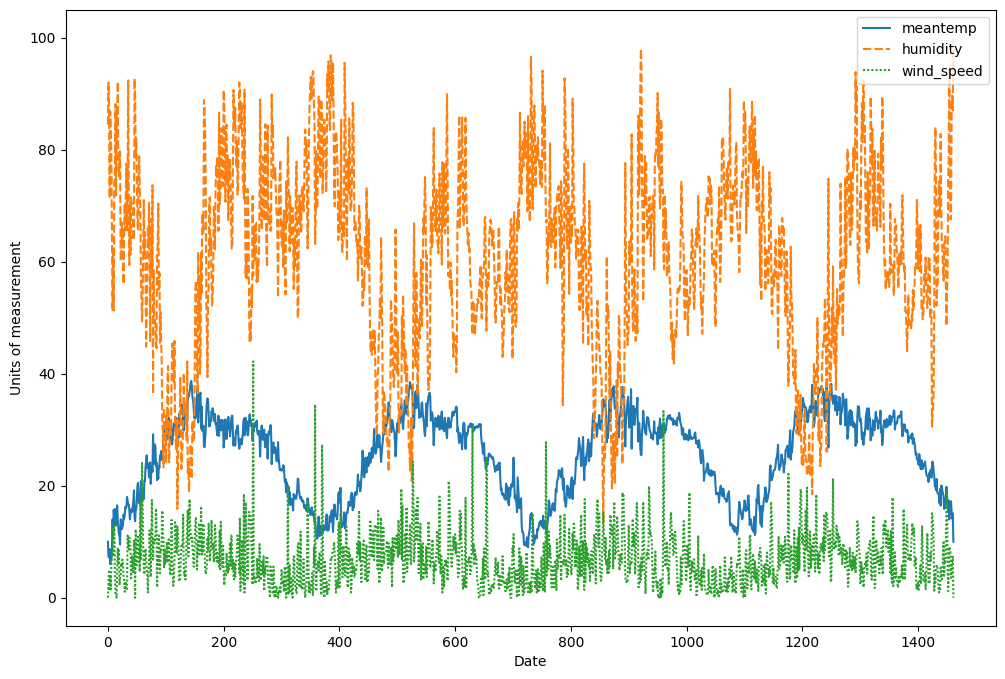

In [7]:
sns.lineplot(data.drop('meanpressure',axis=1))
plt.xlabel('Date')
plt.ylabel('Units of measurement')

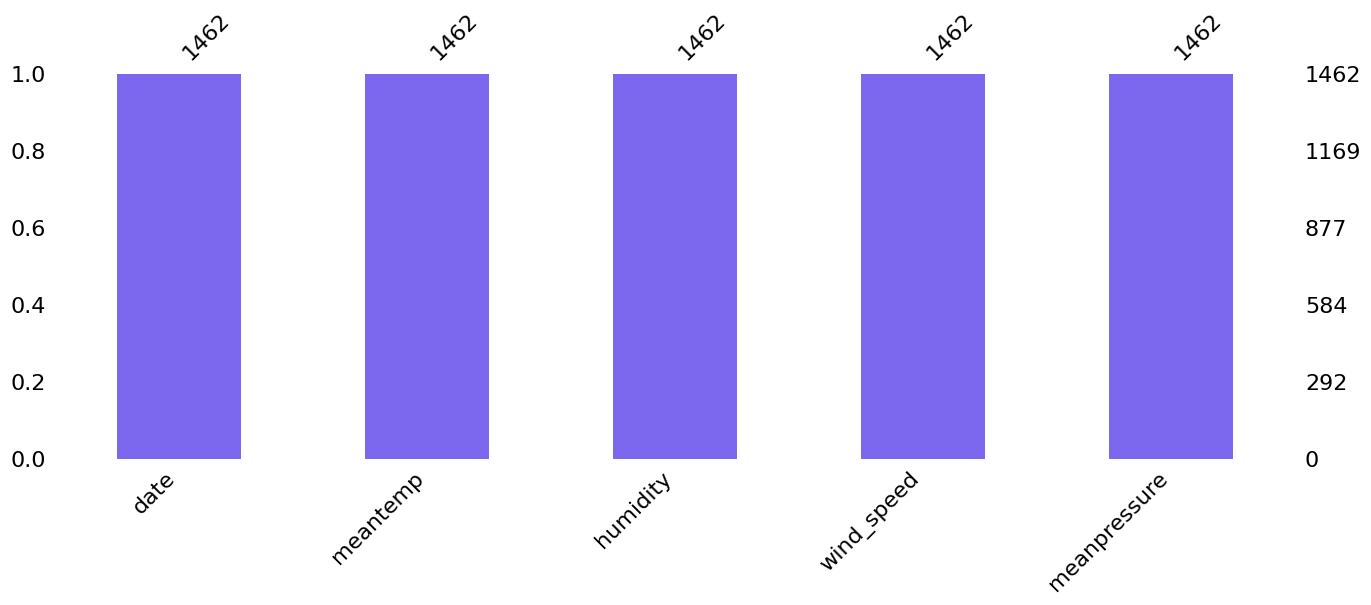

In [9]:
import missingno as msno
msno.bar(data, figsize = (16,5),color = "#7B68EE")
plt.show()

There are no gaps in the data.

In [10]:
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
fig = px.line(data, x='date', y='meantemp', title="Temperature change",template='plotly_dark')

fig.show()

In [11]:
fig = px.line(data, x='date', y='humidity', title="Humidity change",template='plotly_dark')

fig.show()

In [12]:
fig = px.line(data, x='date', y='wind_speed', title="Change in wind speed",template='plotly_dark')

fig.show()

In [13]:
fig = px.line(data, x='date', y='meanpressure', title="Pressure change",template='plotly_dark')

fig.show()

## **Seasonality**

**`Data will present similar patterns seasonally`**

Seasonality is made by three different effects:

1. Trend     (consistent pattern throughout the data)
2. Seasonal  (cyclical effects)
3. Residual  (Error of prediction)


###Check seasonality

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decomposition = seasonal_decompose(x=data['meantemp'], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

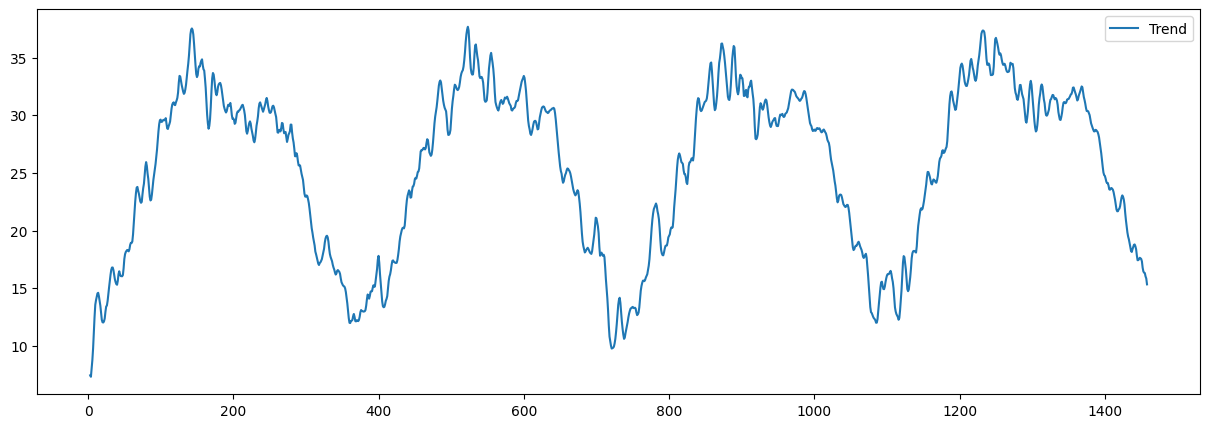

In [15]:
plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()



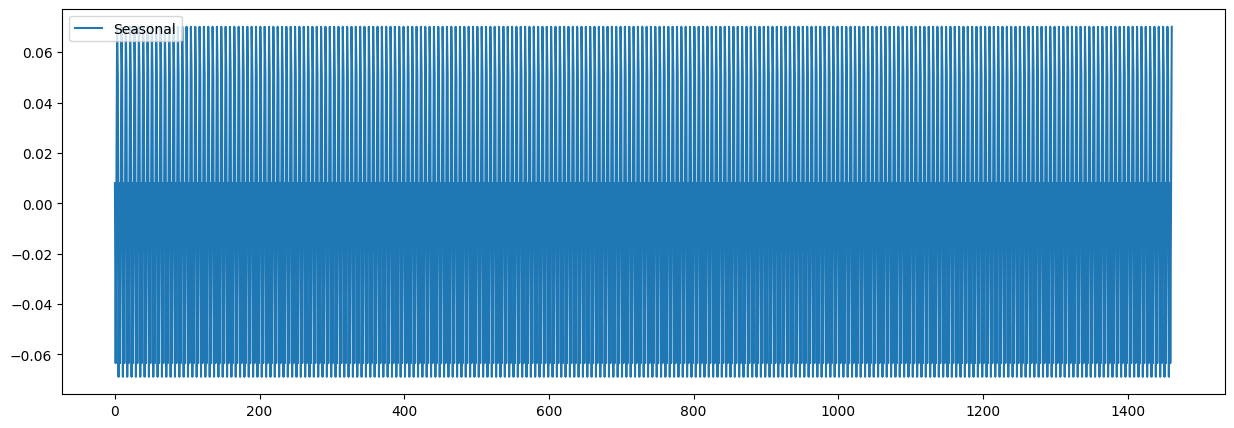

In [16]:
plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()


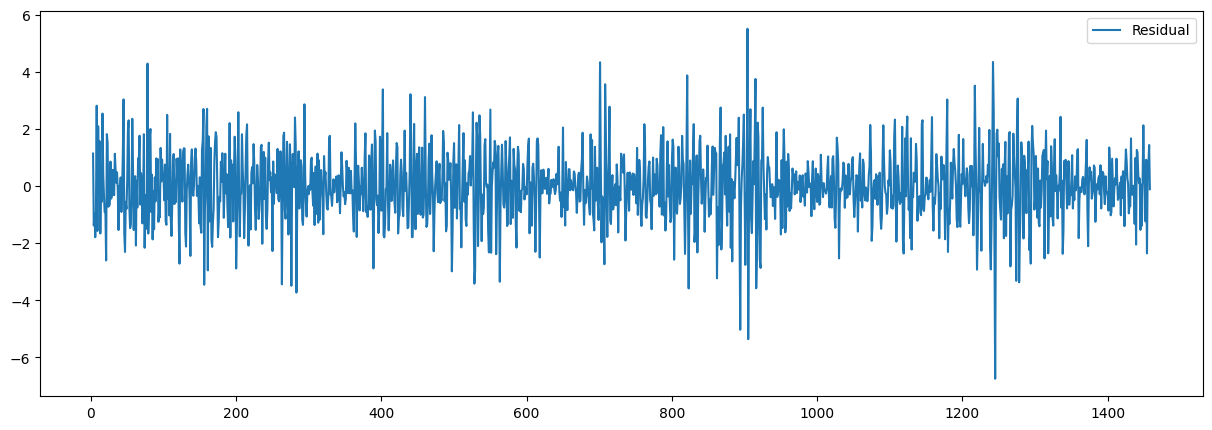

In [17]:
plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

There are large residuals in the data.

In [18]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [19]:
data['Day_of_Week'] =data['date'].dt.dayofweek
data['YEAR']=data['date'].dt.year
data['DAY']=data['date'].dt.day
data['MONTH']=data['date'].dt.month

In [20]:
data.columns


Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure',
       'Day_of_Week', 'YEAR', 'DAY', 'MONTH'],
      dtype='object')

## Features analysis

In [21]:
numeric_features=['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [22]:
import plotly.graph_objs as go
fig = make_subplots(rows=len(numeric_features), cols=3)
i=1
for feature in numeric_features:
  fig.add_trace(go.Histogram(x=data[feature], name=feature), row=i, col=1)
  fig.add_trace(go.Box(x=data[feature], name=feature), row=i, col=2)
  fig.add_trace(go.Violin(x=data[feature], name=feature), row=i, col=3)
  i+=1
fig.update_layout(height=2400, width=1800, title_text='<b>Continuos distributions', title_x=0.5)
fig.show()

There are minor outliers for all two features. One feature is outliers both in terms of the maximum and minimum values.
Features are not normally distributed, with the exception of humidity and possibly atmospheric pressure.

We are interested in the target sign - the average temperature. Let's build a histogram of the distribution of unit differences for this feature.

In [23]:
tempdiff=data['meantemp'].diff(periods=1).dropna()

In [24]:
fig = go.Figure(data=[go.Histogram(x=tempdiff,histnorm='probability density')])
fig.update_layout(
    title="Histogram of unit differences of mean temperature",
    title_x = 0.5,
    xaxis_title="Unit difference",
    yaxis_title="Probability Density",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Hypothesis: a series of unit differences is stationary and further work with it is possible.

Let's build scatterplots of our feature with other features in the table.

In [25]:
for feature in numeric_features:
  fig = px.scatter(data, x='meantemp',y=feature)
  fig.update_layout(title=f"meantemp with {feature}")
  fig.show()

There is a slight inverse correlation with the sign of humidity.

In [26]:
fig = px.scatter(x=tempdiff,y=data.humidity[1:])
fig.update_layout(title="tempdiff with humidity")
fig.show()

The graph above shows that it is not possible to predict the temperature value from the previous day's humidity value.

<Axes: xlabel='MONTH', ylabel='meantemp'>

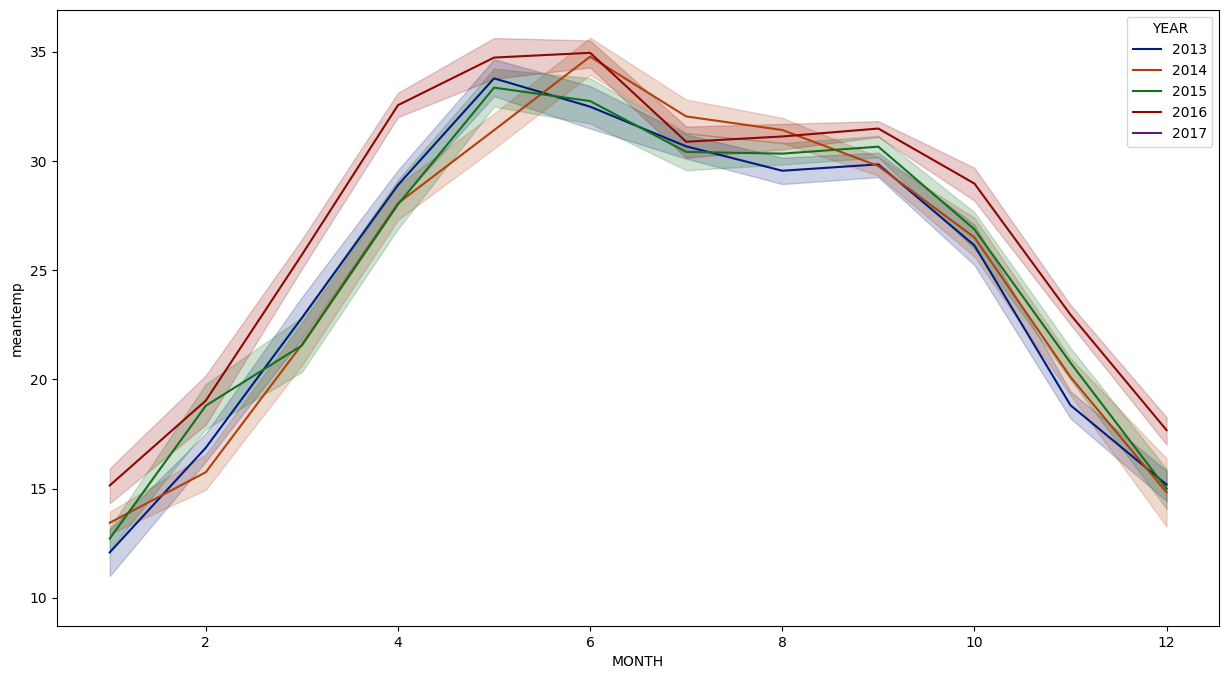

In [27]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x='MONTH',y='meantemp',hue='YEAR',palette='dark')

As we can see, the average temperature increases from year to year. This is primarily due to global climate change.

## Statistical tests

Let's run statistical tests with our dataset. it is proposed to start with the construction of a correlation matrix

In [28]:
correlation = data.corr()
print(correlation['meantemp'].sort_values(ascending = False),'\n')

meantemp        1.000000
wind_speed      0.306468
MONTH           0.122667
YEAR            0.103803
DAY             0.006475
Day_of_Week    -0.009941
meanpressure   -0.038818
humidity       -0.571951
Name: meantemp, dtype: float64 



<ipython-input-28-9cac935b3940>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Index(['meantemp', 'wind_speed', 'MONTH', 'YEAR', 'DAY', 'Day_of_Week',
       'meanpressure', 'humidity'],
      dtype='object')


<ipython-input-29-f28064ae92f2>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

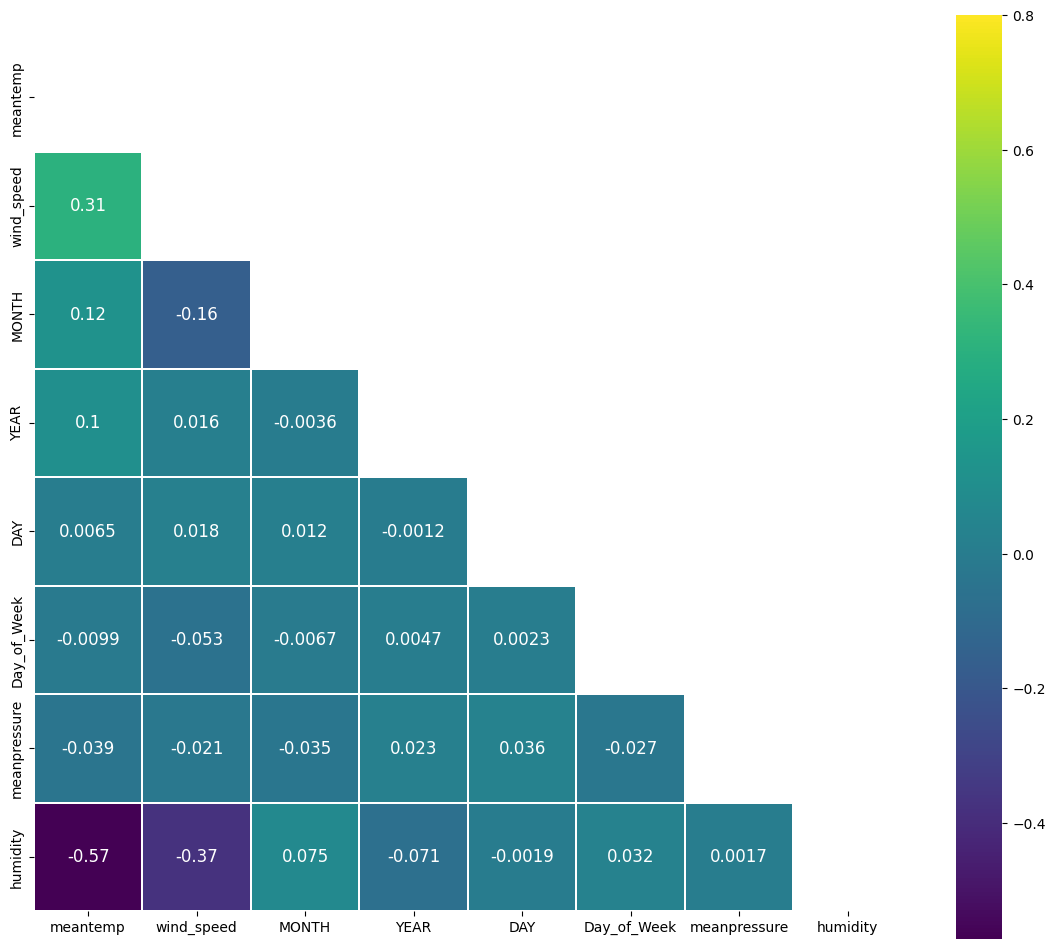

In [29]:
k= 10
cols = correlation.nlargest(k,'meantemp')['meantemp'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
mask = np.triu(np.ones_like(data.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)


Let's check if there is statistical significance between year, month, day and average temperature.

In [30]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data['Day_of_Week'], data['meantemp'])
print('Mann-Whitney test=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
		print('You cant reject the null hypothesis')
else:
		print('Rejecting the null hypothesis')

Mann-Whitney test=104.500, p=0.000
Rejecting the null hypothesis


In [31]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data['YEAR'], data['meantemp'])
print('Mann-Whitney test=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
		print('You cant reject the null hypothesis')
else:
		print('Rejecting the null hypothesis')

Mann-Whitney test=2137444.000, p=0.000
Rejecting the null hypothesis


In [32]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data['DAY'], data['meantemp'])
print('Mann-Whitney test=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
		print('You cant reject the null hypothesis')
else:
		print('Rejecting the null hypothesis')

Mann-Whitney test=431684.000, p=0.000
Rejecting the null hypothesis


In [33]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data['MONTH'], data['meantemp'])
print('Mann-Whitney test=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
		print('You cant reject the null hypothesis')
else:
		print('Rejecting the null hypothesis')

Mann-Whitney test=13072.000, p=0.000
Rejecting the null hypothesis


There is statistical significance in the data.

##**Stationarity**
 **Let's check our target feature for stationarity.**

Dickey-Fuller criterion: p=0.277412


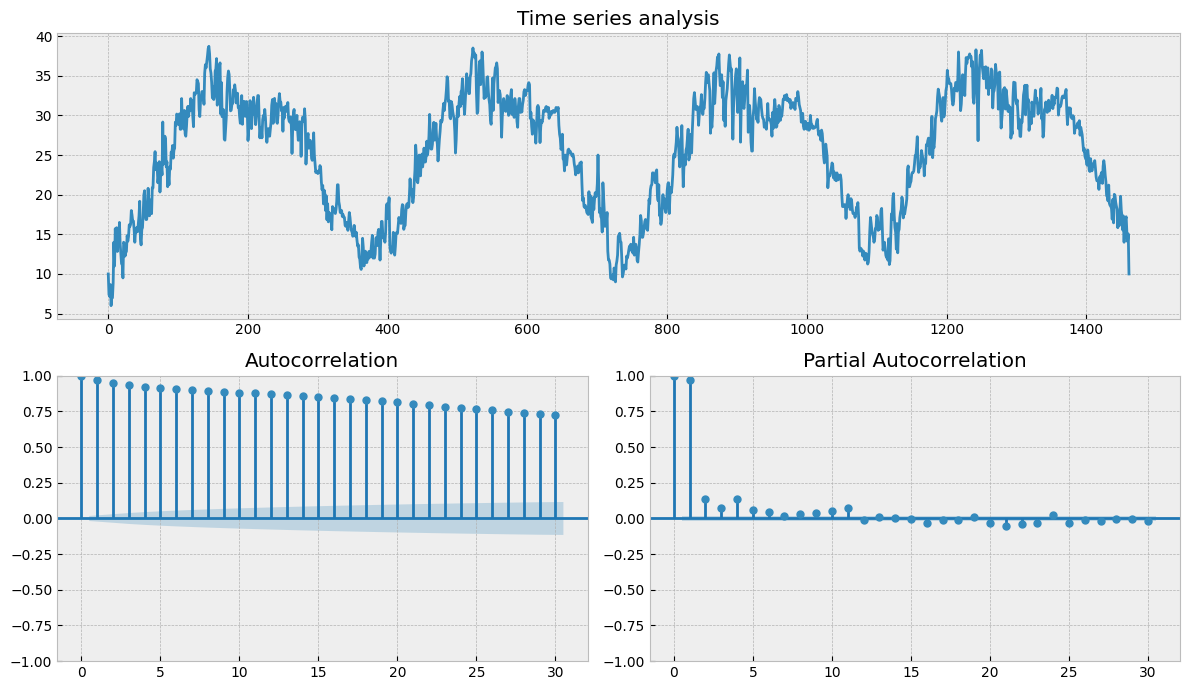

In [34]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm



def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time series analysis')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Dickey-Fuller criterion: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

tsplot(data.meantemp, lags=30)

The series is non-stationary.

Let us check a number of unit differences for stationarity.

Dickey-Fuller criterion: p=0.000000


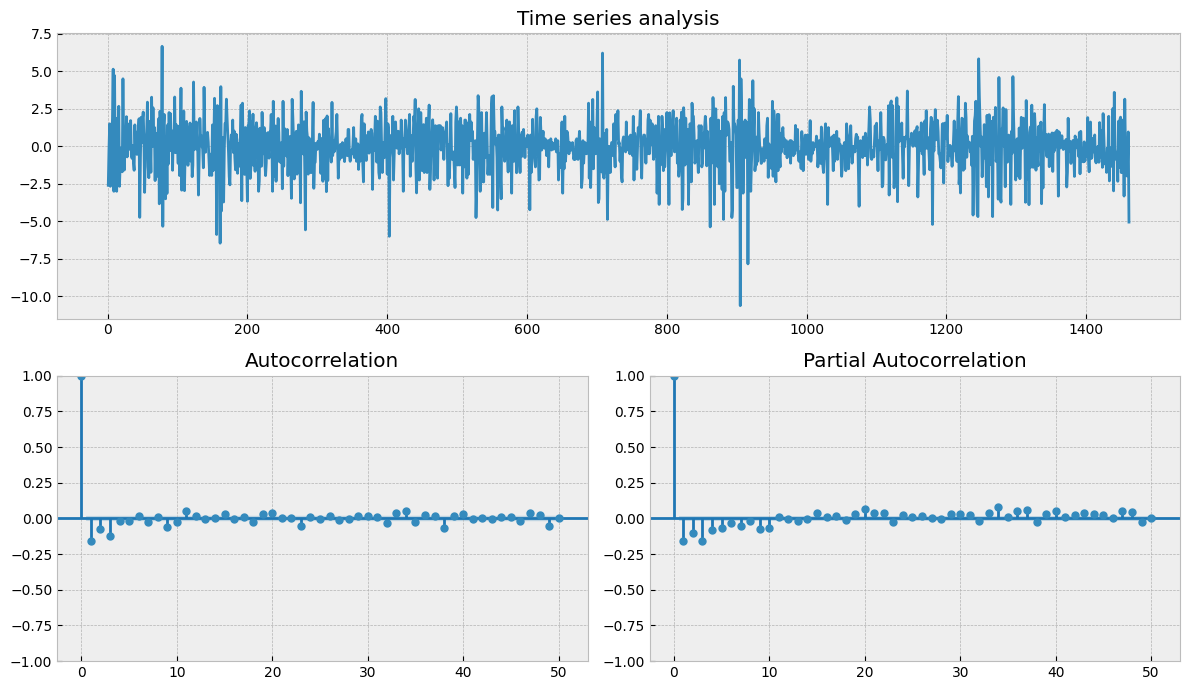

In [35]:
tsplot(tempdiff, lags=50)

The Dickey-Fuller test is equal to zero, but it has a high variance in the form of the graph.

#**Forecasting**

##ARIMA

In [36]:
!pip install pmdarima
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [37]:
train = pd.read_csv('/content/gdrive/MyDrive/DailyDelhiClimateTrain.csv')

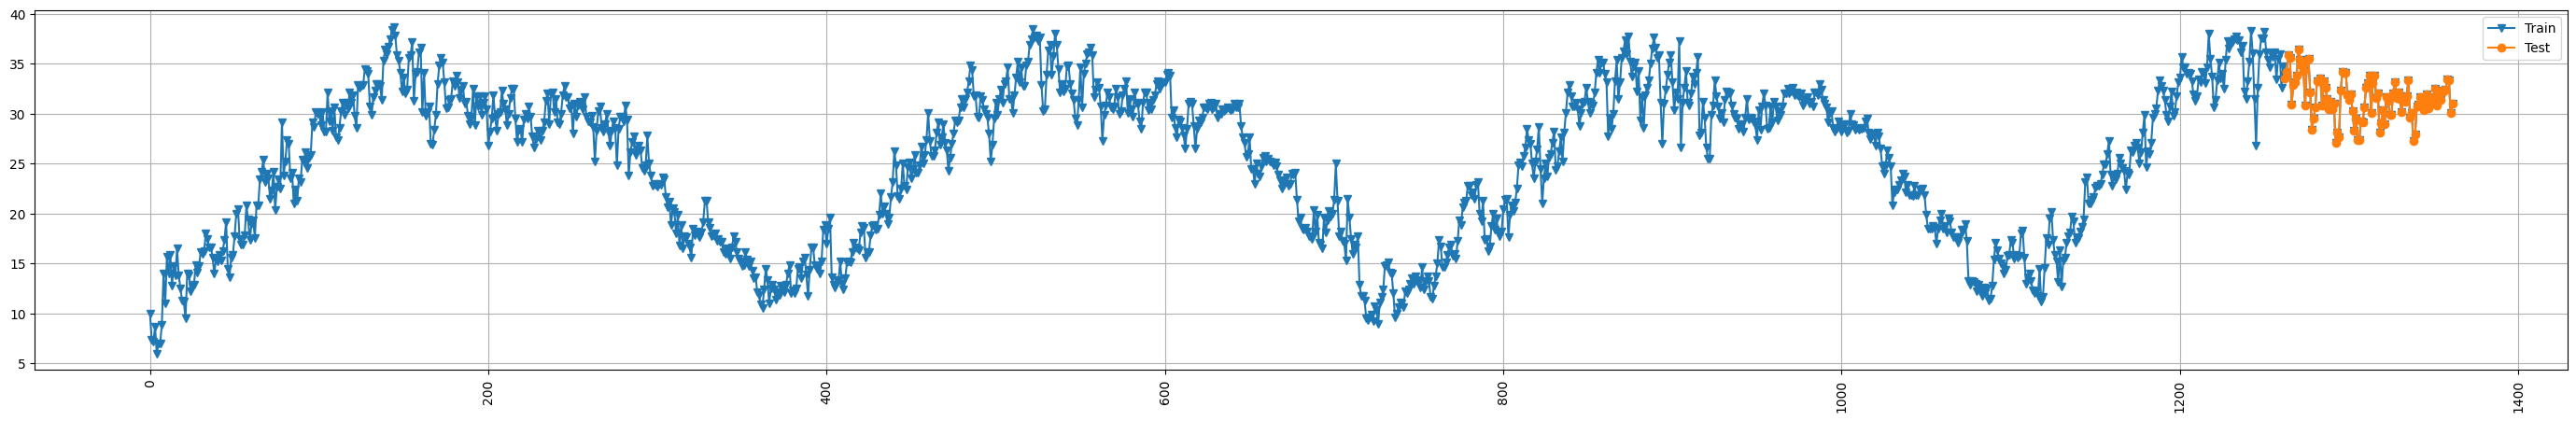

In [38]:
train=train[:-100]
test=train[-100:]

plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['meantemp'], marker='v', label='Train')
plt.plot( test['meantemp'], marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

###Model evaluation

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=inf, Time=64.19 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=5457.135, Time=0.71 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=5182.315, Time=1.22 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=6.93 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=5181.505, Time=0.61 sec
 ARIMA(1,2,0)(0,0,1)[4]             : AIC=5182.246, Time=3.75 sec
 ARIMA(1,2,0)(1,0,1)[4]             : AIC=5184.182, Time=2.36 sec
 ARIMA(2,2,0)(0,0,0)[4]             : AIC=5065.073, Time=0.99 sec
 ARIMA(2,2,0)(1,0,0)[4]             : AIC=5067.061, Time=1.97 sec
 ARIMA(2,2,0)(0,0,1)[4]             : AIC=5067.040, Time=2.48 sec
 ARIMA(2,2,0)(1,0,1)[4]             : AIC=5068.947, Time=5.16 sec
 ARIMA(3,2,0)(0,0,0)[4]             : AIC=4918.194, Time=1.78 sec
 ARIMA(3,2,0)(1,0,0)[4]             : AIC=4777.544, Time=8.78 sec
 ARIMA(3,2,0)(2,0,0)[4]             : AIC=4690.464, Time=15.12 sec
 ARIMA(3,2,0)(2,0,1)[4]             : AIC

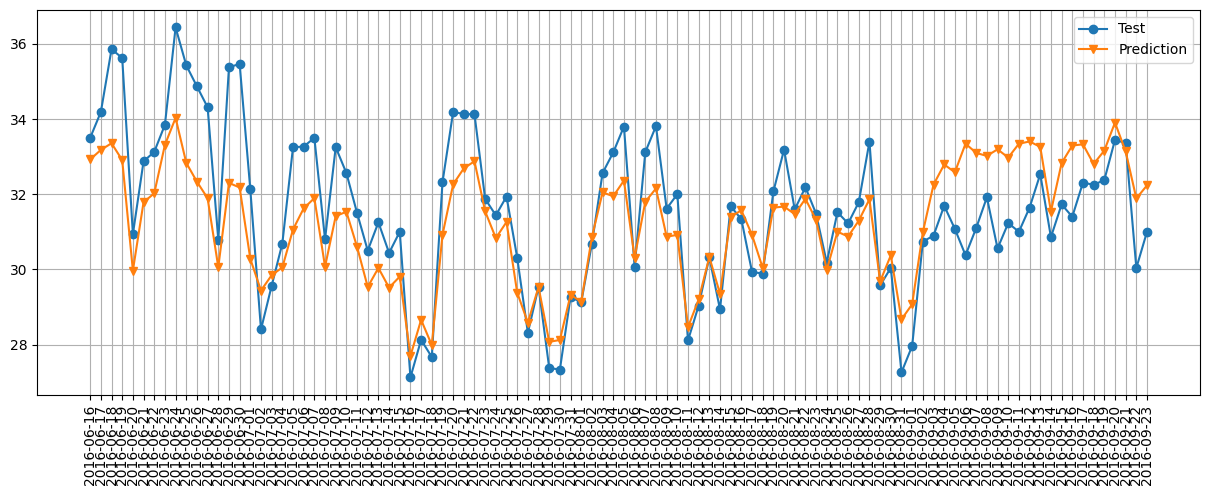

Mean Absolute Percentage Error 0.03295482930571065
Mean Squared Error 1.7413113101789426
RMSE 1.3195875530554775
AIC values 4690.464380994352


In [39]:
# Fit a simple auto_arima model
from sklearn.metrics import mean_squared_error

arima = pm.auto_arima(train['meantemp'],X=train.drop(columns=['date','meantemp']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

pred_arima=arima.predict(n_periods=100, X=test.drop(columns=['date','meantemp']), alpha=0.05)
pred_arima

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['date'][-100:],test['meantemp'], marker='o', label='Test')
plt.plot(train['date'][-100:],pred_arima, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['meantemp'], pred_arima)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['meantemp'], pred_arima)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))

## SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1362
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 4)   Log Likelihood               -2260.325
Date:                             Tue, 09 Jan 2024   AIC                           4536.650
Time:                                     18:56:56   BIC                           4578.325
Sample:                                          0   HQIC                          4552.256
                                            - 1362                                         
Covariance Type:                               opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
humidity        -0.1340      0.003    -39.460      0.000      -0.141      -0.127
wind_speed      -0.01

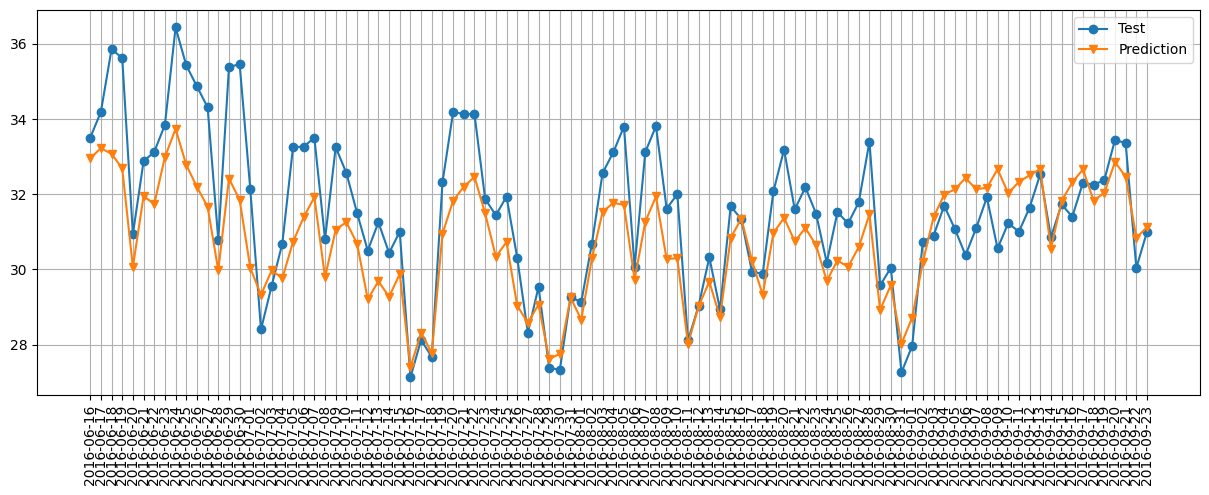

Mean Absolute Percentage Error: 0.03342730015454057
Mean Squared Error: 1.8147794705471707
Root Mean Squared Error: 1.3471375098879739
AIC value: 4536.650150737484


In [40]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model
sarima_model = SARIMAX(train['meantemp'],
                       exog=train.drop(columns=['date', 'meantemp']),
                       order=(2, 0, 0),  # Specificare l'ordine ARIMA
                       seasonal_order=(1, 1, 1, 4),  # Specifica l'ordine stagionale SARIMA
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fit = sarima_model.fit(disp=False)

# Print out summary information on the fit
print(sarima_fit.summary())
print(sarima_fit.params)

# Make predictions
pred = sarima_fit.get_forecast(steps=100, exog=test.drop(columns=['date', 'meantemp']))
pred_mean = pred.predicted_mean

# Plot predictions
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(test['date'], test['meantemp'], marker='o', label='Test')
plt.plot(test['date'], pred_mean, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Evaluation metrics
mape = mean_absolute_percentage_error(test['meantemp'], pred_mean)
mse = mean_squared_error(test['meantemp'], pred_mean)
rmse = mse ** 0.5

print("=" * 50)
print("Mean Absolute Percentage Error:", mape)
print("=" * 50)
print("Mean Squared Error:", mse)
print("=" * 50)
print("Root Mean Squared Error:", rmse)
print("=" * 50)
print("AIC value:", sarima_fit.aic)


##Comparing models

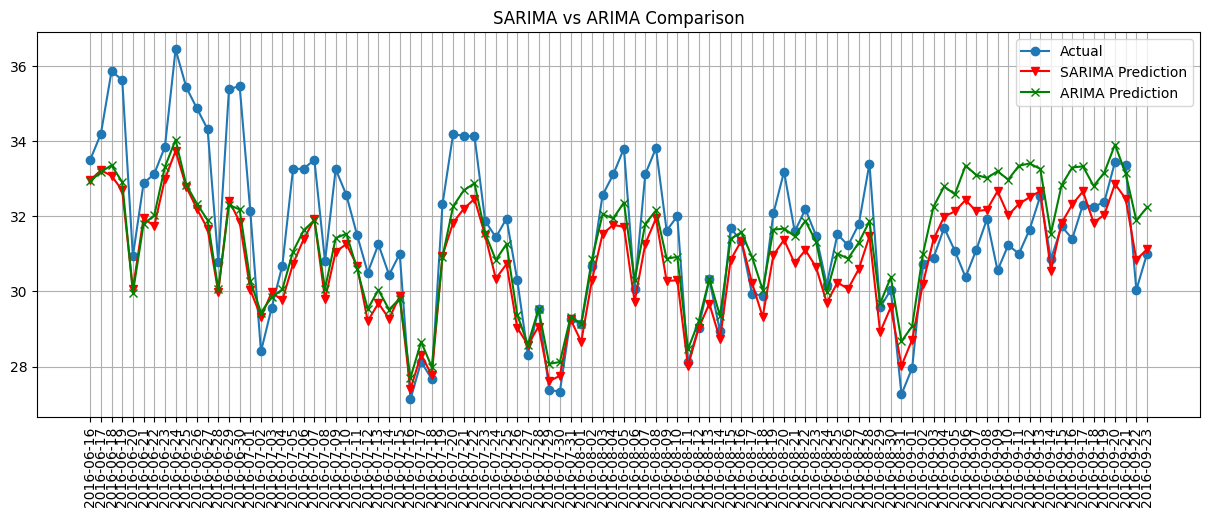

SARIMA Metrics:
Mean Absolute Percentage Error: 0.03342730015454057
Mean Squared Error: 1.8147794705471707
Root Mean Squared Error: 1.3471375098879739
ARIMA Metrics:
Mean Absolute Percentage Error: 0.03295482930571065
Mean Squared Error: 1.7413113101789426
Root Mean Squared Error: 1.3195875530554775


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have the SARIMA model results stored in 'sarima_fit' and ARIMA model results stored in 'arima'
# (Replace with your actual variable names)

# Make predictions with SARIMA model
sarima_pred = sarima_fit.get_forecast(steps=100, exog=test.drop(columns=['date', 'meantemp'])).predicted_mean

# Make predictions with ARIMA model
arima_pred = arima.predict(n_periods=100, X=test.drop(columns=['date', 'meantemp']))

# Plot predictions
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(test['date'], test['meantemp'], marker='o', label='Actual')
plt.plot(test['date'], sarima_pred, marker='v', label='SARIMA Prediction', color='red')
plt.plot(test['date'], arima_pred, marker='x', label='ARIMA Prediction', color='green')
plt.legend()
plt.xticks(rotation=90)
plt.title("SARIMA vs ARIMA Comparison")
plt.show()

# Calculate and print evaluation metrics
mape_sarima = mean_absolute_percentage_error(test['meantemp'], sarima_pred)
mse_sarima = mean_squared_error(test['meantemp'], sarima_pred)
rmse_sarima = mse_sarima ** 0.5

mape_arima = mean_absolute_percentage_error(test['meantemp'], arima_pred)
mse_arima = mean_squared_error(test['meantemp'], arima_pred)
rmse_arima = mse_arima ** 0.5

print("=" * 50)
print("SARIMA Metrics:")
print("Mean Absolute Percentage Error:", mape_sarima)
print("Mean Squared Error:", mse_sarima)
print("Root Mean Squared Error:", rmse_sarima)
print("=" * 50)

print("=" * 50)
print("ARIMA Metrics:")
print("Mean Absolute Percentage Error:", mape_arima)
print("Mean Squared Error:", mse_arima)
print("Root Mean Squared Error:", rmse_arima)
print("=" * 50)




# Deep learnig

We chose to use MLP (Multilayer Perceptron) as a model because for time series forecasting it has several advantages: capturing temporal relationships, flexibility in feature engineering, handling non-linear relationships.

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#data = data_2 # load your DataFrame here

# Preprocessing and Creating Lagged Features
def create_lagged_features(data, n_lags=10):
    lagged_df = data.copy()
    for i in range(1, n_lags + 1):
        lagged_df[f'lag_{i}'] = lagged_df['meantemp'].shift(i)
    lagged_df = lagged_df.dropna()
    return lagged_df

n_lags = 5  # Number of lags (can be tuned)
lagged_df = create_lagged_features(data, n_lags)

# Splitting Data
X = lagged_df[[f'lag_{i}' for i in range(1, n_lags + 1)]]
y = lagged_df['meantemp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define MLP Model
mlp = MLPRegressor(hidden_layer_sizes=(5, 30), activation='relu', max_iter=1000)

# Train the Model
mlp.fit(X_train_scaled, y_train)
# Evaluate the Model
y_pred = mlp.predict(X_test_scaled)
errors = y_test - y_pred
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.5935592353152397


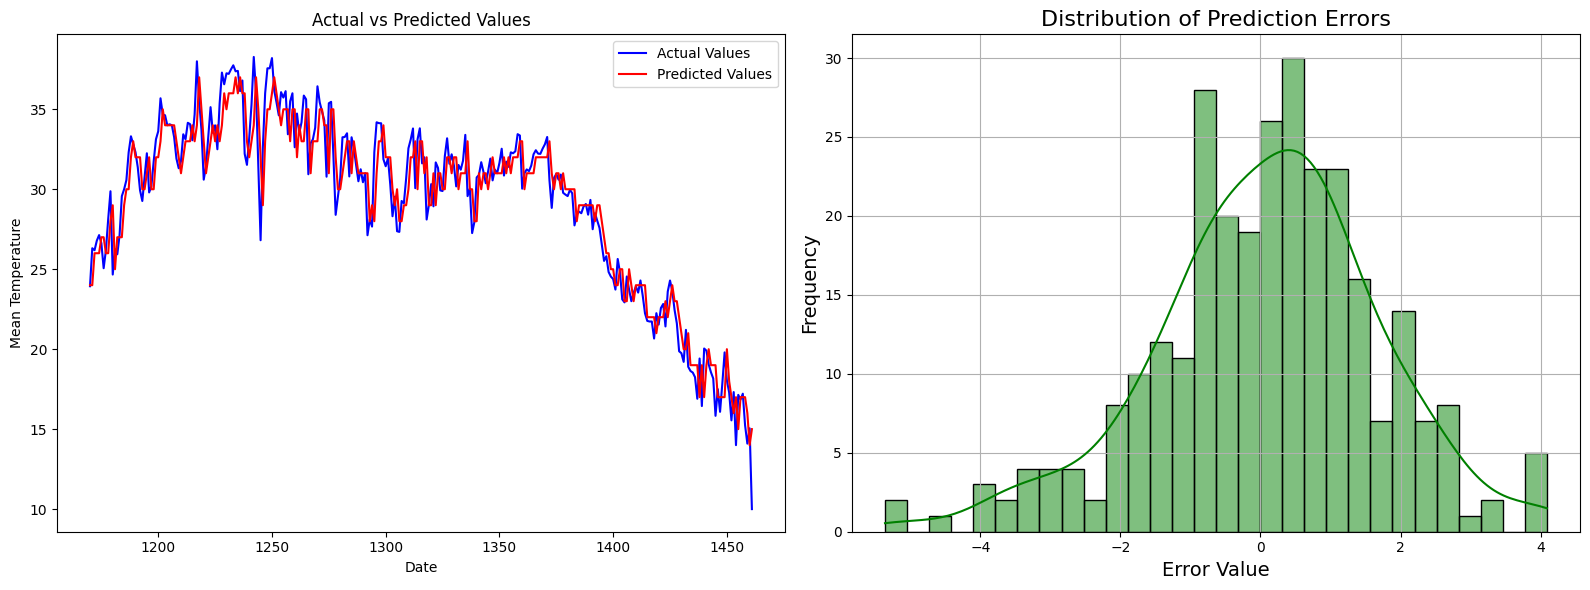

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred, y_test, and errors are available

# Plotting the predicted values against the actual values
plt.figure(figsize=(16, 6))

# Subplot 1 - Actual vs Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(y_test.index, y_test, label='Actual Values', color='blue')
plt.plot(y_test.index, y_pred.round(), label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()

# Subplot 2 - Distribution of Prediction Errors
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(errors, bins=30, kde=True, color='green')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.tight_layout()  # Adjusts subplots to avoid overlapping
plt.show()
